In [16]:
# Kirjastot

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [17]:
# Datan lataaminen ja tarkastaminen
df = pd.read_csv('muokattu_twitter_dataset.csv')

df.head()

,ID,Date,Query,Username,Comment
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [18]:
# Valitaan tekstidata (Comments-sarake)
comments = df['Comment']

# Muunnetaan tekstidata numeeriseksi TF-IDF-vektorisoinnilla
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(comments)

In [19]:
# Määritetään klusterien määrä (esimerkiksi 3: positiivinen, neutraali, negatiivinen)
k = 3

# K-means-algoritmin soveltaminen
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Lisätään klusteritieto dataan
df['Cluster'] = kmeans.labels_

# Näytetään muutamia rivejä klusteritiedolla
df[['Comment', 'Cluster']].head()



,Comment,Cluster
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,1
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [20]:
# Tarkastellaan, kuinka monta viestiä kuuluu kuhunkin klusteriin
print(df.groupby('Cluster').size())

# Katsotaan esimerkkiviestejä jokaisesta klusterista
for cluster in range(k):
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster]['Comment'].head(5).tolist())


Cluster
0    399
1     64
2     36
dtype: int64

Cluster 0:
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ", '@Kwesidei not the whole crew ', 'Need a hug ']

Cluster 1:
['my whole body feels itchy and like its on fire ', "@smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown.", "one of my friend called me, and asked to meet with her at Mid Valley today...but i've no time *sigh* ", "ok I'm sick and spent an hour sitting in the shower cause I was too sick to stand and held back the puke like a champ. BED now ", '@cocomix04 ill tell ya the story later  not a good day and ill be workin for like three more hours...']

Cluster 2:
['this week is not going as i 

In [21]:
# Klustereiden tulkinta esimerkkiviestien perusteella
cluster_names = {
    0: "Negatiivinen",
    1: "Neutraali",
    2: "Positiivinen"
}

# Lisätään klusterin nimi dataan
df['Cluster_Label'] = df['Cluster'].map(cluster_names)

# Näytetään data klusterinimen kanssa
df[['Comment', 'Cluster', 'Cluster_Label']].head()


,Comment,Cluster,Cluster_Label
0,is upset that he can't update his Facebook by ...,0,Negatiivinen
1,@Kenichan I dived many times for the ball. Man...,0,Negatiivinen
2,my whole body feels itchy and like its on fire,1,Neutraali
3,"@nationwideclass no, it's not behaving at all....",0,Negatiivinen
4,@Kwesidei not the whole crew,0,Negatiivinen


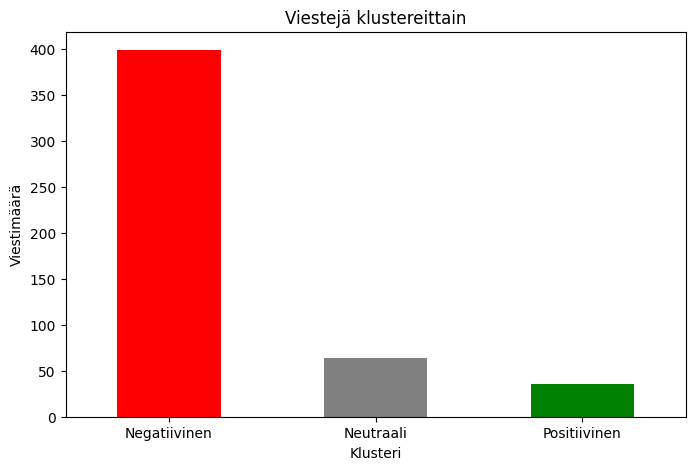

In [22]:
# Visualisoidaan klusterien jakauma
cluster_counts = df['Cluster_Label'].value_counts()

plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title("Viestejä klustereittain")
plt.xlabel("Klusteri")
plt.ylabel("Viestimäärä")
plt.xticks(rotation=0)
plt.show()
